# SNLP Assignment 1

Name 1: Rricha Jalota <br/>
Id 1: <br/>
Email id 1: <br/>

Name 2: Pavle Markovic <br/>
Id 2: 7007913 <br/>
Email id 2: pama00002 <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 2, 3, and the bonus question (if you attempt it). There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted.


---


## Exercise 1 (0 points)

Please carefully read the instructions on how to use Jupyter Notebooks and how to hand in the assignments.

## Exercise 2 (4 = 1+1+2 points)

The **Mandelbrot distribution** is a power-law distribution over ranked data.
\begin{equation}
f(r) \propto \frac{m}{(c+r)^B}
\end{equation}
Here $r$ is the rank of the data point and $c$ and $B$ are the parameters that define the distribution. $m$ is a normalizing constant ensuring that the distribution is a true probability distribution. 

**Zipf's** law or rather the Zipfian distribution is a special case of the Mandelbrot distribution. It holds that the relative frequency of a word in a corpus is inversely proportional to its rank in the frequency table. 

1. Which values for $m$, $c$ yield the Zipfian distribution? Explain how you arrived at these values. Show the result in the form of a $\LaTeX$ formula. What is a reasonable value for $B$? (1 Point)

2. Look again at Chapter 2, Slide 16. Why do the parameters of the distribution ($m$, $c$, $B$) differ in practice, i. e. for a real language, whether natural or artificial, from those obtained in 1.? (1 Point)

3. The so-called stick-breaking process is a notion of the [Dirichlet process](https://en.wikipedia.org/wiki/Dirichlet_process#The_stick-breaking_process). (the following [blog post](https://medium.com/@albertoarrigoni/dirichlet-processes-917f376b02d2) gives a nice introduction into the Dirichlet process, you should at least read the part concerned with stick-breaking).
The function `stick_breaking` in the code cell below draws a sample from a stick-breaking process with intensity $\alpha$. 
  * Choose a suitable value of $\alpha$ such that the distribution follows Zipf's law, and explain how $\alpha$ affects the distribution. 
  * Sample 100 values from the distribution, and plot them on log scale along with the 'ideal' Zipfian distribution obtained in 1. You will have to adjust the exponent $B$ such that it matches the distribution. The plotting code should be added to and imported from `exercise_2.py`. If you make changes to the code block below, please comment on why it was necessary.
  * Relate to your findings in 2.

## Exercise 2 answers:
1. Regarding $m$ and $c$ values, $m$ should be the frequency of the most common word, while $c$ should be 0 (zero). Zipf's law states $f$.$r$ = $k$, where $f$ is a frequency of a word, $r$ is a rank of the word and $k$ is a constant. Since rank of the most frequent word is 1, it results in constant to be equal to its frequency and as it turns out that is good approximation for the constant. Reasonable value for $B$ would be 1 for Zipf's law, and around 1 for Mandelbrot distribution in general. Formula: $f(r) \propto \frac{m}{(c+r)^B}$ => $f(r) \propto \frac{m}{(0+r)^1}$ => $f(r) \propto \frac{m}{r}$ => $f(r).r \propto m$, where $m$ is a constant ($k$ from the formula at the beginning).
2. Because Zipf's law doesn't produce good estimate for low and high rank words, while for the middle ones estimates are roughly correct. For high rank words, the most common $N$ words, Zipf's law underestimates real values (predictions from Zipf's law are smaller then observed values), while for the low rank words, the least common $N$ words, Zipf's law overestimates real values (predictions from Zipf's law are greater then observed values). Therefore, these parameters should be adjusted to capture these "curvatures".
3. 

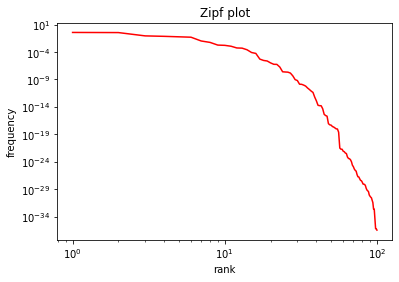

In [5]:
from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

n = 100
alpha = 0.5# TODO: choose alpha
B = 1.1# TODO: choose B

stick_lengths = exercise_2.stick_breaking(n, alpha)
exercise_2.plot_stick_lengths(stick_lengths, alpha, B) #TODO: in exercise_2.py

## Exercise 3 (6 = 3+0.5+1+0.5+1 points)

The following cell executes the function `analysis` from the `exercise_3.py` file. You are given a tokenized input (list of words). 

1. Plot the frequencies against rank for the inputs (different languages) along with an 'ideal' curve according to the Zipf's law. Use the log-log scale. (3 points)

Then, answer the following questions and elaborate:

2. Does Zipf's law form an accurate prediction of your data? (0.5 point)
3. What are the differences between the languages? What causes them? (1 point)
4. In your plot, what causes the vertical gaps ("steps") for high-rank words  (rightmost)? (0.5 point)
5. Zipf's law "predicts" the frequency of the n-th rank word. Compute the mean squared error of these predictions $\big(\frac{1}{n} \sum (\hat{y} - y)^2\big)$, and output the value to 10 decimal digits. (1 point)

Please extend `exercise_3.py`. Ideally the following cell remains unchanged and outputs your code. If you make changes, please comment on why it was necessary.

## Exercise 3 answers:
2. Not really, especially not for python file. For English and German, it would be good enough for larger $m$, while for python file, however, additional tweaking to Mandelbrot distribution is required.
3. English and German are natural and Germanic languages, so they tend to have similar distribution of words and correspond more closely to Zipf's law. On the other hand, python is programming (artificial) language, therefore, doesn't have Zipfsian distribution intrinsically and it also has limited vocabulary since majority of words (tokens) are selected from a small predefined set of words (tokens).
4. Frequencies of high-rank words are similar due to the fact that rare words tend to appear a few times, therefore, many of them have same frequencies resulting in "steps".
5. MSE for English: 110.6970613293. MSE for German: 183.4465929729. MSE for python file: 890.9301358561.

English
MSE: 110.6970613293


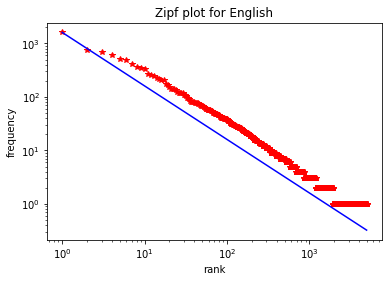

German
MSE: 183.4465929729


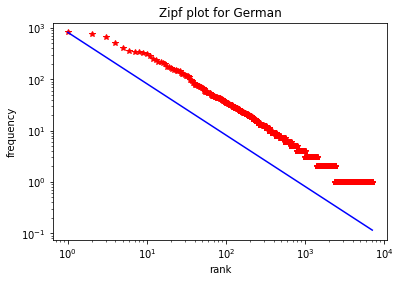

Python
MSE: 890.9301358561


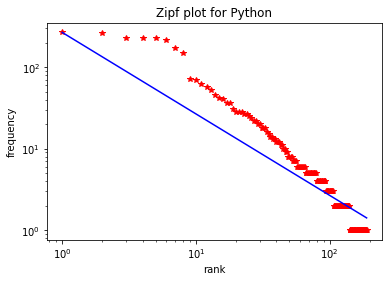

In [6]:
import tokenize
from importlib import reload
import exercise_3
exercise_3 = reload(exercise_3)

# run on English text
with open("data/alice_in_wonderland.txt", "r") as f:
    exercise_3.analysis("English", f.read().lower().split())

# run on German text
with open("data/alice_im_wunderland.txt", "r") as f:
    exercise_3.analysis("German", f.read().lower().split())

# run on PyTorch source
with open("data/torch_activation.py", "r") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    exercise_3.analysis("Python", tokens)

# Bonus (1 point)

Repeat exercise 2 but on the character level (as opposed to word level). Your analysis can be much shorter but comment on the differences between the languages. You have to, however, write your own loader similar to the one we provided. For this, you may create a file `bonus.py` and import your code from there in a similar fashion to the above questions.